# SpeakSense - Language Detection System (Machine Learning CSCI 6364)

**Abde Manaaf Ghadiali (G29583342), Gehna Ahuja (G00000000), Venkatesh Shanmugam (G00000000)**

The objective of this project is to develop a robust and accurate system capable of detecting the language spoken in audio recordings. By leveraging advanced machine learning algorithms and signal processing techniques, the system aims to accurately identify the language spoken in various audio inputs, spanning diverse accents, dialects, and environmental conditions. This language detection solution seeks to provide practical applications in speech recognition, transcription, translation, and other fields requiring language-specific processing, thereby enhancing accessibility and usability across linguistic boundaries.

This code sets up an environment for working with audio data, particularly focusing on Indian languages. Here's a breakdown of what each part does:

1. **Importing Libraries**: Imports necessary libraries for data manipulation, visualization, machine learning, and audio processing.

2. **Setting Display Options and Suppressing Warnings**: Configures display options for Pandas and suppresses warnings.

3. **Setting Random Seed**: Sets a random seed for reproducibility.

4. **Downloading Datasets**: Checks if the necessary datasets are downloaded, and if not, downloads them from Kaggle using the OpenDatasets library and organizes them into appropriate directories.

5. **Audio Data Processing**: Prepares the audio data for further analysis. This might include feature extraction, preprocessing, and organizing the data for training machine learning models.

6. **Machine Learning**: Utilizes machine learning techniques for tasks such as spoken language identification. This involves splitting the data into training and testing sets, building machine learning models (such as Random Forest or Gradient Boosting), evaluating the models, and generating classification reports and confusion matrices.

7. **Deep Learning**: Utilizes deep learning techniques, specifically convolutional neural networks (CNNs), for tasks such as spoken language identification. This involves building and training deep learning models using the TensorFlow and Keras libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D, Conv1D, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing import image_dataset_from_directory

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

# Model Training

### Classical ML Models

In [2]:
mfcc_feature_mean_dataframe = pd.read_csv('../data/model_data/mfcc_feature_mean_dataframe_v1.csv', converters={'mfcc_features_mean': pd.eval})
mfcc_feature_mean_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,german,241.913,22050,10,"[-300.68445, 89.6091, 7.92721, 13.455984, -7.7..."
1,../data/spoken_language_identification/train/t...,german,247.070,22050,10,"[-263.93332, 117.02668, 1.5109781, 10.758349, ..."
2,../data/spoken_language_identification/train/t...,german,235.787,22050,10,"[-314.33453, 107.28552, 36.247402, 30.700155, ..."
3,../data/spoken_language_identification/train/t...,german,236.962,22050,10,"[-315.92404, 101.78857, 30.910984, 27.501352, ..."
4,../data/spoken_language_identification/train/t...,german,239.393,22050,10,"[-309.02856, 100.20847, 22.71667, 26.422443, 8..."
...,...,...,...,...,...,...
188045,../data/model_data/chunked_audio\9_96_urdu.flac,urdu,231.222,22050,10,"[-289.52158, 119.929054, 3.1143055, 35.24892, ..."
188046,../data/model_data/chunked_audio\9_97_urdu.flac,urdu,269.815,22050,10,"[-210.34914, 111.94805, -7.401781, 19.434948, ..."
188047,../data/model_data/chunked_audio\9_98_urdu.flac,urdu,215.311,22050,10,"[-348.04916, 96.16326, 5.742584, 25.839731, 8...."
188048,../data/model_data/chunked_audio\9_99_urdu.flac,urdu,210.095,22050,10,"[-344.74905, 127.2353, 13.040299, 33.02013, 0...."


In [3]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.05, random_state=0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_test = (np.concatenate(X_train['mfcc_features_mean'].values, axis=0).reshape(-1, 40),
                          np.concatenate(X_test['mfcc_features_mean'].values, axis=0).reshape(-1, 40))

y_train, y_test = (pd.factorize(y_train)[0],
                          pd.factorize(y_test)[0])

print(f'Train Shape: {X_train.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Test Shape: {y_test.shape}')


Train Shape: (178647, 6), Test Shape: (9403, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,spanish,229.777,22050,10,"[-291.7021, 130.4501, -6.3776603, 10.83143, 1...."
1,../data/spoken_language_identification/train/t...,english,224.658,22050,10,"[-350.76697, 98.512436, 25.20733, 22.763617, 1..."
2,../data/spoken_language_identification/train/t...,english,198.004,22050,10,"[-379.483, 99.54119, -18.515503, 8.382871, -9...."
3,../data/model_data/chunked_audio\10_740_gujara...,gujarati,230.878,22050,10,"[-285.9631, 114.29823, -25.65398, 0.041782953,..."
4,../data/model_data/chunked_audio\5_455_malayal...,malayalam,218.895,22050,10,"[-313.40582, 112.699135, 6.2937875, 9.26513, 6..."
...,...,...,...,...,...,...
178642,../data/spoken_language_identification/train/t...,english,232.299,22050,10,"[-300.9526, 59.18042, -1.1451567, 31.920263, -..."
178643,../data/model_data/chunked_audio\11_382_urdu.flac,urdu,203.604,22050,10,"[-345.43256, 113.95454, 11.991175, 18.125118, ..."
178644,../data/model_data/chunked_audio\8_547_marathi...,marathi,210.321,22050,10,"[-302.15475, 104.789734, 9.274743, 16.31928, 9..."
178645,../data/model_data/chunked_audio\5_327_kannada...,kannada,181.105,22050,10,"[-367.6094, 126.951454, -61.16765, 30.778297, ..."


Train Shape: (178647, 40), Test Shape: (9403, 40)
Target: Train Shape: (178647,), Test Shape: (9403,)


In [4]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train)
X_test_scaled = scaler_object.transform(X_test)

In [5]:
X_train

array([[-2.91702100e+02,  1.30450100e+02, -6.37766030e+00, ...,
         2.43698930e+00, -9.60031750e-01,  9.30826300e-01],
       [-3.50766970e+02,  9.85124360e+01,  2.52073300e+01, ...,
         7.61141540e+00,  2.70008560e+00,  7.65296550e+00],
       [-3.79483000e+02,  9.95411900e+01, -1.85155030e+01, ...,
         2.27708960e+00,  1.25730690e+00,  9.33750800e-01],
       ...,
       [-3.02154750e+02,  1.04789734e+02,  9.27474300e+00, ...,
        -7.25873700e-02, -7.26694300e-01, -7.19473500e-01],
       [-3.67609400e+02,  1.26951454e+02, -6.11676500e+01, ...,
        -2.06577900e+00, -3.80309370e+00, -1.55541840e+00],
       [-3.42332800e+02,  1.38394640e+02,  1.08939470e+01, ...,
        -3.06866720e+00, -1.94826210e+00, -8.29044300e-01]])

In [6]:
X_train_scaled

array([[ 0.51993246,  0.96817036, -0.06265742, ...,  0.85184329,
        -0.19557238,  0.20381887],
       [-0.44856962, -0.31809173,  1.156991  , ...,  3.07838818,
         1.47896847,  3.07493606],
       [-0.91943385, -0.27665954, -0.53135792, ...,  0.78303878,
         0.81888257,  0.20506797],
       ...,
       [ 0.34853763, -0.06527892,  0.54175717, ..., -0.22802238,
        -0.08881812, -0.50104664],
       [-0.72473933,  0.82726539, -2.17836251, ..., -1.08568863,
        -1.49630208, -0.85809009],
       [-0.31027233,  1.28812991,  0.60428243, ..., -1.51722936,
        -0.64769779, -0.54784582]])

In [7]:
print('Training RFC and GBC on Unscaled Data!')
rfc_model = RandomForestClassifier(n_estimators=10, n_jobs=-1).fit(X=X_train, y=y_train)
gbc_model = GradientBoostingClassifier(n_estimators=10).fit(X=X_train, y=y_train)

print('Training RFC and GBC on Scaled Data!')
rfc_model_scaled = RandomForestClassifier(n_estimators=10, n_jobs=-1).fit(X=X_train_scaled, y=y_train)
gbc_model_scaled = GradientBoostingClassifier(n_estimators=10).fit(X=X_train_scaled, y=y_train)

Training RFC and GBC on Unscaled Data!
Training RFC and GBC on Scaled Data!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

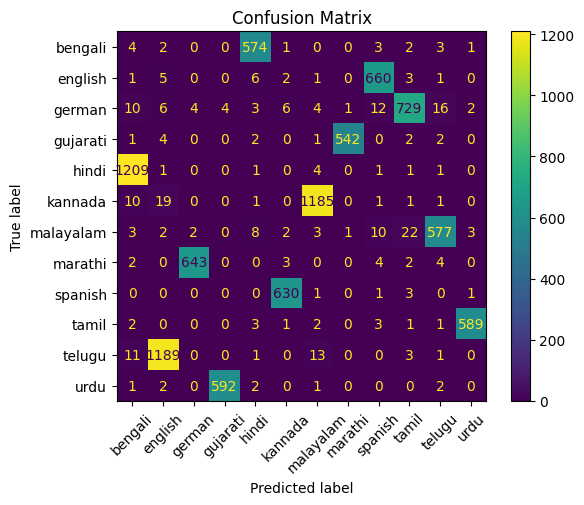

In [8]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

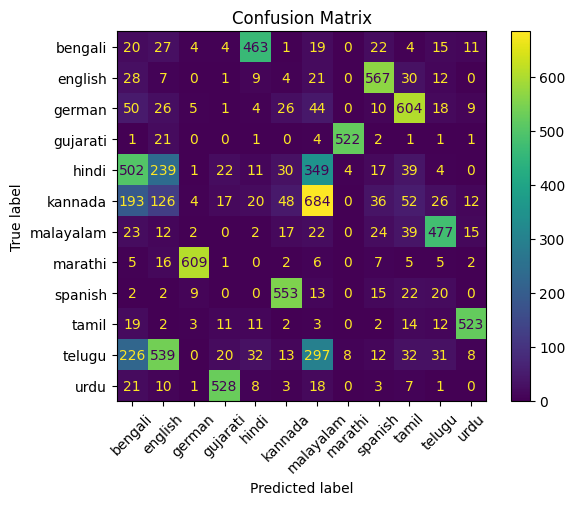

In [9]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

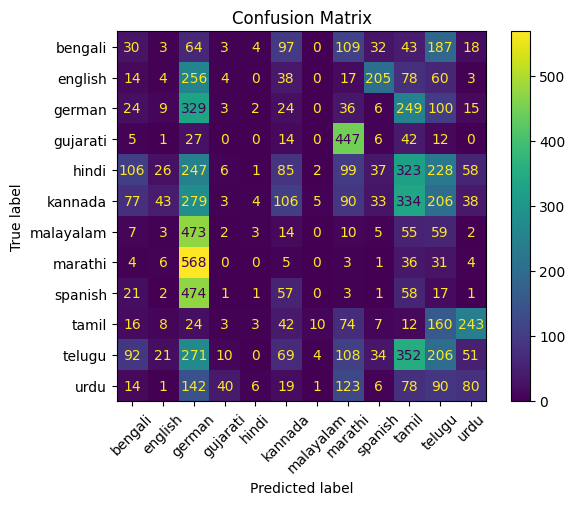

In [10]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

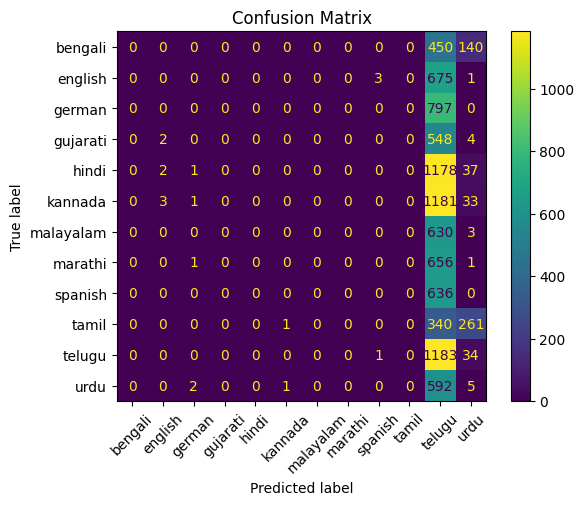

In [11]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [12]:
roc_auc_score(list(y_test), list(rfc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.44377049584680534

In [13]:
roc_auc_score(list(y_test), list(gbc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.4061756068352178

In [14]:
roc_auc_score(list(y_test), list(rfc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.44137945978308596

In [15]:
roc_auc_score(list(y_test), list(gbc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.40617557703858037

In [16]:
print(classification_report(y_test, rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.01      0.00       590
           1       0.00      0.01      0.01       679
           2       0.01      0.01      0.01       797
           3       0.00      0.00      0.00       554
           4       0.00      0.00      0.00      1218
           5       0.00      0.00      0.00      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.00      0.00      0.00       602
          10       0.00      0.00      0.00      1218
          11       0.00      0.00      0.00       600

    accuracy                           0.00      9403
   macro avg       0.00      0.00      0.00      9403
weighted avg       0.00      0.00      0.00      9403



In [17]:
print(classification_report(y_test, gbc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.02      0.03      0.02       590
           1       0.01      0.01      0.01       679
           2       0.01      0.01      0.01       797
           3       0.00      0.00      0.00       554
           4       0.02      0.01      0.01      1218
           5       0.07      0.04      0.05      1218
           6       0.01      0.03      0.02       633
           7       0.00      0.00      0.00       658
           8       0.02      0.02      0.02       636
           9       0.02      0.02      0.02       602
          10       0.05      0.03      0.03      1218
          11       0.00      0.00      0.00       600

    accuracy                           0.02      9403
   macro avg       0.02      0.02      0.02      9403
weighted avg       0.02      0.02      0.02      9403



In [18]:
print(classification_report(y_test, rfc_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.07      0.05      0.06       590
           1       0.03      0.01      0.01       679
           2       0.10      0.41      0.17       797
           3       0.00      0.00      0.00       554
           4       0.04      0.00      0.00      1218
           5       0.19      0.09      0.12      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.01      0.02      0.01       602
          10       0.15      0.17      0.16      1218
          11       0.16      0.13      0.14       600

    accuracy                           0.08      9403
   macro avg       0.06      0.07      0.06      9403
weighted avg       0.08      0.08      0.07      9403



In [19]:
print(classification_report(y_test, gbc_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       590
           1       0.00      0.00      0.00       679
           2       0.00      0.00      0.00       797
           3       0.00      0.00      0.00       554
           4       0.00      0.00      0.00      1218
           5       0.00      0.00      0.00      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.00      0.00      0.00       602
          10       0.13      0.97      0.23      1218
          11       0.01      0.01      0.01       600

    accuracy                           0.13      9403
   macro avg       0.01      0.08      0.02      9403
weighted avg       0.02      0.13      0.03      9403



### Dense Model

In [20]:
mfcc_feature_mean_dataframe = pd.read_csv('../data/model_data/mfcc_feature_mean_dataframe_v1.csv', converters={'mfcc_features_mean': pd.eval})
mfcc_feature_mean_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,german,241.913,22050,10,"[-300.68445, 89.6091, 7.92721, 13.455984, -7.7..."
1,../data/spoken_language_identification/train/t...,german,247.070,22050,10,"[-263.93332, 117.02668, 1.5109781, 10.758349, ..."
2,../data/spoken_language_identification/train/t...,german,235.787,22050,10,"[-314.33453, 107.28552, 36.247402, 30.700155, ..."
3,../data/spoken_language_identification/train/t...,german,236.962,22050,10,"[-315.92404, 101.78857, 30.910984, 27.501352, ..."
4,../data/spoken_language_identification/train/t...,german,239.393,22050,10,"[-309.02856, 100.20847, 22.71667, 26.422443, 8..."
...,...,...,...,...,...,...
188045,../data/model_data/chunked_audio\9_96_urdu.flac,urdu,231.222,22050,10,"[-289.52158, 119.929054, 3.1143055, 35.24892, ..."
188046,../data/model_data/chunked_audio\9_97_urdu.flac,urdu,269.815,22050,10,"[-210.34914, 111.94805, -7.401781, 19.434948, ..."
188047,../data/model_data/chunked_audio\9_98_urdu.flac,urdu,215.311,22050,10,"[-348.04916, 96.16326, 5.742584, 25.839731, 8...."
188048,../data/model_data/chunked_audio\9_99_urdu.flac,urdu,210.095,22050,10,"[-344.74905, 127.2353, 13.040299, 33.02013, 0...."


In [21]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.03, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.03, random_state=0)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_val, X_test = (np.concatenate(X_train['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1),
                          np.concatenate(X_val['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1),
                          np.concatenate(X_test['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1))

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (176935, 6), Validation Shape: (5473, 6), Test Shape: (5642, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/model_data/chunked_audio\1_503_marathi...,marathi,169.249,22050,10,"[-372.60193, 97.58422, 11.535016, 16.202219, 1..."
1,../data/model_data/chunked_audio\12_559_telugu...,telugu,226.256,22050,10,"[-312.26233, 127.97743, -10.590753, 16.846308,..."
2,../data/spoken_language_identification/train/t...,english,172.434,22050,10,"[-436.2415, 72.27146, -21.515247, 28.214872, -..."
3,../data/model_data/chunked_audio\6_231_malayal...,malayalam,183.292,22050,10,"[-361.73267, 76.21364, -12.226183, 24.076464, ..."
4,../data/spoken_language_identification/train/t...,german,250.218,22050,10,"[-247.81427, 120.87878, -1.769096, 19.966732, ..."
...,...,...,...,...,...,...
176930,../data/model_data/chunked_audio\10_609_tamil....,tamil,247.179,22050,10,"[-246.22928, 120.01204, 14.8433275, 19.358667,..."
176931,../data/spoken_language_identification/train/t...,english,198.784,22050,10,"[-402.5719, 61.625023, -26.071997, 19.151659, ..."
176932,../data/model_data/chunked_audio\10_708_kannad...,kannada,181.656,22050,10,"[-339.5378, 135.2996, -82.566956, 11.61837, -5..."
176933,../data/model_data/chunked_audio\7_658_telugu....,telugu,230.366,22050,10,"[-318.65048, 84.14175, 1.3367115, 26.958487, 6..."


Train Shape: (176935, 40, 1), Validation Shape: (5473, 40, 1), Test Shape: (5642, 40, 1)
Target: Train Shape: (176935, 12), Validation Shape: (5473, 12), Test Shape: (5642, 12)


In [22]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 40)).reshape(-1, 40, 1)
X_val_scaled = scaler_object.transform(X_val.reshape(-1, 40)).reshape(-1, 40, 1)
X_test_scaled = scaler_object.transform(X_test.reshape(-1, 40)).reshape(-1, 40, 1)

In [23]:
def build_model_dense(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [24]:
model = build_model_dense(input_shape=(40, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC')])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train, y_train, epochs=20, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val, y_val))

Epoch 1/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6816 - auc: 0.9587 - loss: 0.8762 - val_accuracy: 0.8783 - val_auc: 0.9928 - val_loss: 0.3453 - learning_rate: 0.0014
Epoch 2/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8560 - auc: 0.9906 - loss: 0.4043 - val_accuracy: 0.9393 - val_auc: 0.9976 - val_loss: 0.1808 - learning_rate: 0.0013
Epoch 3/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8917 - auc: 0.9936 - loss: 0.3137 - val_accuracy: 0.9536 - val_auc: 0.9990 - val_loss: 0.1324 - learning_rate: 0.0012
Epoch 4/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9124 - auc: 0.9951 - loss: 0.2596 - val_accuracy: 0.9695 - val_auc: 0.9990 - val_loss: 0.0984 - learning_rate: 0.0010
Epoch 5/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9261 - auc: 0.9963 - loss: 0.2200 - val_accuracy: 0.9795 - val_auc: 0.9995 - val_loss: 0.0721 - learning_rate: 9.3297e-04
Epoch 6/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accu

In [25]:
model = build_model_dense(input_shape=(40, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train_scaled, y_train, epochs=20, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7103 - loss: 0.7974 - val_accuracy: 0.9260 - val_loss: 0.2056 - learning_rate: 0.0014
Epoch 2/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8758 - loss: 0.3541 - val_accuracy: 0.9594 - val_loss: 0.1293 - learning_rate: 0.0013
Epoch 3/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9149 - loss: 0.2545 - val_accuracy: 0.9733 - val_loss: 0.0868 - learning_rate: 0.0012
Epoch 4/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9334 - loss: 0.2010 - val_accuracy: 0.9819 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 5/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9453 - loss: 0.1671 - val_accuracy: 0.9883 - val_loss: 0.0426 - learning_rate: 9.3297e-04
Epoch 6/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9527 - loss: 0.1445 - val_accuracy: 0.9889 - val_loss: 0.0378 - learning_rate: 8.3968e-04
Epoch 7/20
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accur

In [26]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
model.evaluate(X_test, y_test)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9951 - auc: 0.9998 - loss: 0.0168


[0.01727077178657055, 0.9950371980667114, 0.9998903274536133]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

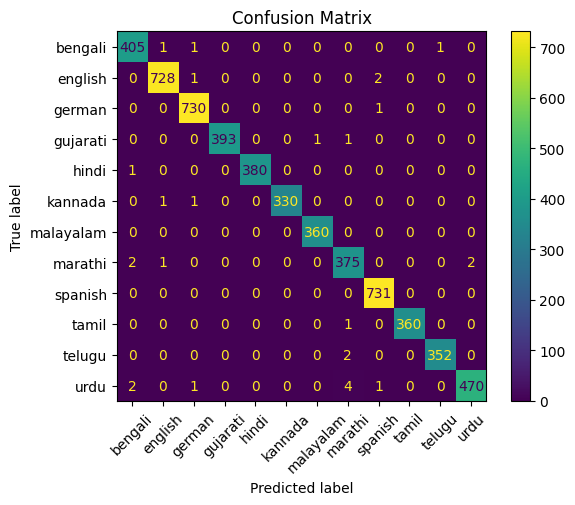

In [27]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [28]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9970694884728856

In [29]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       1.00      1.00      1.00       731
           2       0.99      1.00      1.00       731
           3       1.00      0.99      1.00       395
           4       1.00      1.00      1.00       381
           5       1.00      0.99      1.00       332
           6       1.00      1.00      1.00       360
           7       0.98      0.99      0.98       380
           8       0.99      1.00      1.00       731
           9       1.00      1.00      1.00       361
          10       1.00      0.99      1.00       354
          11       1.00      0.98      0.99       478

    accuracy                           1.00      5642
   macro avg       1.00      0.99      0.99      5642
weighted avg       1.00      1.00      1.00      5642



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


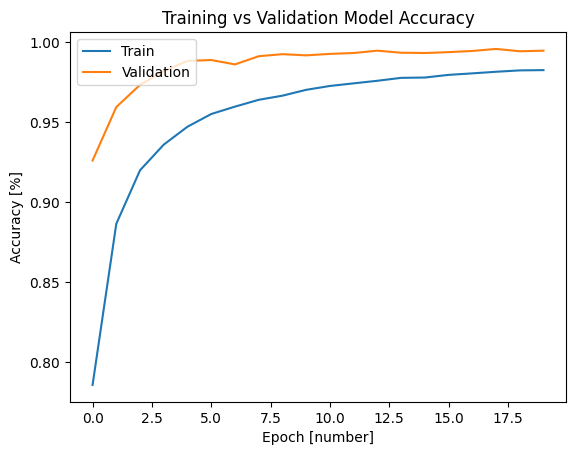

In [30]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

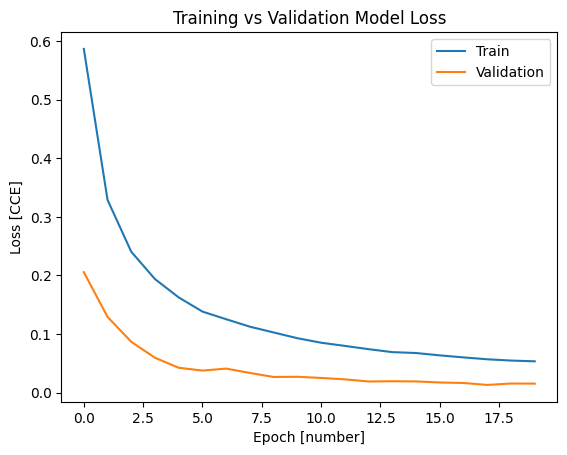

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
model = load_model('../data/models/language_detection_model_scaled_v1.keras')
model.evaluate(X_test_scaled, y_test)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9947 - loss: 0.0160


[0.014867331832647324, 0.9953917264938354]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

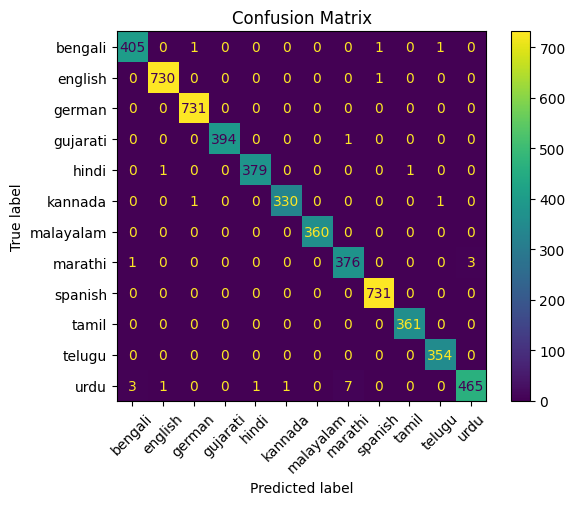

In [33]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [34]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9972799075120217

In [35]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       731
           3       1.00      1.00      1.00       395
           4       1.00      0.99      1.00       381
           5       1.00      0.99      1.00       332
           6       1.00      1.00      1.00       360
           7       0.98      0.99      0.98       380
           8       1.00      1.00      1.00       731
           9       1.00      1.00      1.00       361
          10       0.99      1.00      1.00       354
          11       0.99      0.97      0.98       478

    accuracy                           1.00      5642
   macro avg       1.00      0.99      1.00      5642
weighted avg       1.00      1.00      1.00      5642



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


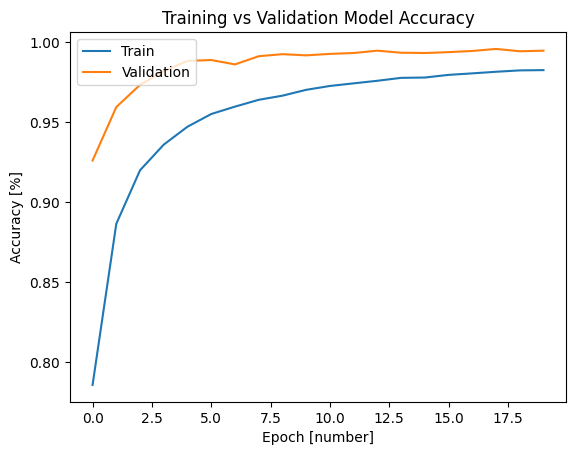

In [36]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

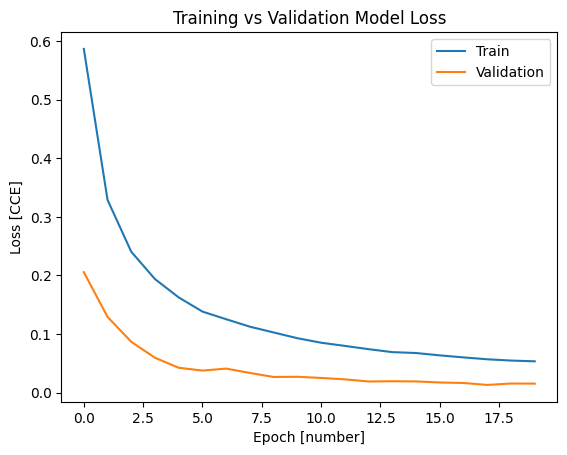

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN Model

In [38]:
mfcc_feature_dataframe = pd.read_csv('../data/model_data/mfcc_feature_dataframe_v1.csv', converters={'mfcc_features': pd.eval}, verbose=2)

Tokenization took: 5953.09 ms
Type conversion took: 3687755.53 ms
Parser memory cleanup took: 3.85 ms


In [45]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_dataframe, mfcc_feature_dataframe['language_label'], stratify=mfcc_feature_dataframe['language_label'], test_size=0.05, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=0)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_val, X_test = (np.concatenate(X_train['mfcc_features'].values, axis=0).reshape(-1, 40, 431),
                          np.concatenate(X_val['mfcc_features'].values, axis=0).reshape(-1, 40, 431),
                          np.concatenate(X_test['mfcc_features'].values, axis=0).reshape(-1, 40, 431))

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (5415, 6), Validation Shape: (285, 6), Test Shape: (300, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features
0,../data/model_data/chunked_audio\0_451_malayal...,malayalam,224.486,22050,10,"[[-201.0696563720703, -252.42071533203125, -27..."
1,../data/model_data/chunked_audio\2_50_hindi.flac,hindi,213.135,22050,10,"[[-203.6726837158203, -137.2501678466797, -119..."
2,../data/model_data/chunked_audio\3_344_hindi.flac,hindi,203.318,22050,10,"[[-187.26840209960938, -214.97872924804688, -3..."
3,../data/model_data/chunked_audio\8_479_bengali...,bengali,203.370,22050,10,"[[-550.7992553710938, -539.9030151367188, -539..."
4,../data/model_data/chunked_audio\8_70_hindi.flac,hindi,232.370,22050,10,"[[-131.61683654785156, -155.94882202148438, -1..."
...,...,...,...,...,...,...
5410,../data/spoken_language_identification/train/t...,english,217.701,22050,10,"[[-580.8419189453125, -580.787109375, -580.887..."
5411,../data/model_data/chunked_audio\11_668_hindi....,hindi,229.227,22050,10,"[[-605.42919921875, -611.2146606445312, -612.9..."
5412,../data/spoken_language_identification/train/t...,english,236.801,22050,10,"[[-321.0284118652344, -267.3987731933594, -286..."
5413,../data/spoken_language_identification/train/t...,english,227.976,22050,10,"[[-301.3959045410156, -301.8360290527344, -336..."


Train Shape: (5415, 40, 431), Validation Shape: (285, 40, 431), Test Shape: (300, 40, 431)
Target: Train Shape: (5415, 12), Validation Shape: (285, 12), Test Shape: (300, 12)


In [46]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 40 * 431)).reshape(-1, 40, 431)
X_val_scaled = scaler_object.transform(X_val.reshape(-1, 40 * 431)).reshape(-1, 40, 431)
X_test_scaled = scaler_object.transform(X_test.reshape(-1, 40 * 431)).reshape(-1, 40, 431)

In [47]:
X_train.shape

(5415, 40, 431)

In [48]:
X_train_scaled.shape

(5415, 40, 431)

In [60]:
def build_model_cnn(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='valid', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [61]:
model = build_model_cnn(input_shape=(40, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train, y_train, epochs=20, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val, y_val))

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.4857 - loss: 1.5451 - val_accuracy: 0.2421 - val_loss: 3.0064 - learning_rate: 0.0014
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.7097 - loss: 0.7463 - val_accuracy: 0.6912 - val_loss: 0.8438 - learning_rate: 0.0013
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.7772 - loss: 0.5717 - val_accuracy: 0.7439 - val_loss: 0.7101 - learning_rate: 0.0012
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8107 - loss: 0.4527 - val_accuracy: 0.8246 - val_loss: 0.5688 - learning_rate: 0.0010
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8533 - loss: 0.3543 - val_accuracy: 0.8211 - val_loss: 0.5158 - learning_rate: 9.3297e-04
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8665 - loss: 0.3195 - val_accuracy: 0.7754 - val_loss: 0.5978 - learning_rate: 8.3968e-04
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.

In [62]:
model = build_model_cnn(input_shape=(40, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train_scaled, y_train, epochs=20, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.4482 - loss: 1.6236 - val_accuracy: 0.4281 - val_loss: 2.7253 - learning_rate: 0.0014
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.6904 - loss: 0.8245 - val_accuracy: 0.7158 - val_loss: 0.7257 - learning_rate: 0.0013
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.7889 - loss: 0.5318 - val_accuracy: 0.7298 - val_loss: 0.6680 - learning_rate: 0.0012
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8135 - loss: 0.4632 - val_accuracy: 0.7509 - val_loss: 0.5971 - learning_rate: 0.0010
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8572 - loss: 0.3446 - val_accuracy: 0.8035 - val_loss: 0.5641 - learning_rate: 9.3297e-04
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8928 - loss: 0.2712 - val_accuracy: 0.8456 - val_loss: 0.4334 - learning_rate: 8.3968e-04
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.

In [63]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9063 - loss: 0.2306


[0.28133538365364075, 0.8833333253860474]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

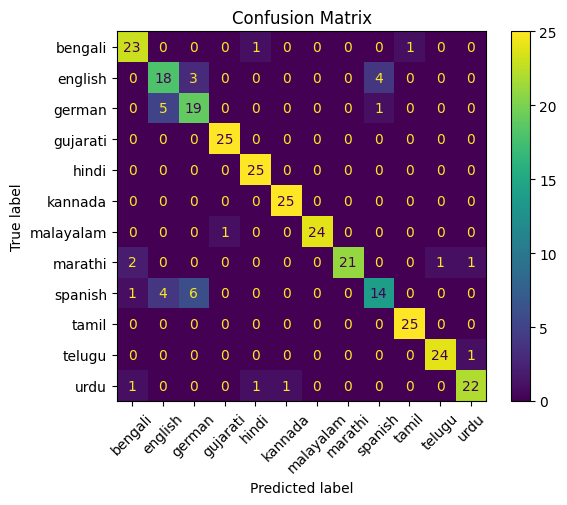

In [64]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [65]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9363636363636364

In [66]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.67      0.72      0.69        25
           2       0.68      0.76      0.72        25
           3       0.96      1.00      0.98        25
           4       0.93      1.00      0.96        25
           5       0.96      1.00      0.98        25
           6       1.00      0.96      0.98        25
           7       1.00      0.84      0.91        25
           8       0.74      0.56      0.64        25
           9       0.96      1.00      0.98        25
          10       0.96      0.96      0.96        25
          11       0.92      0.88      0.90        25

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


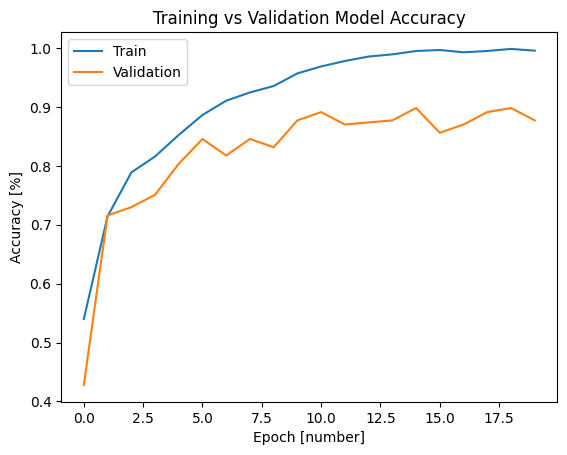

In [67]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

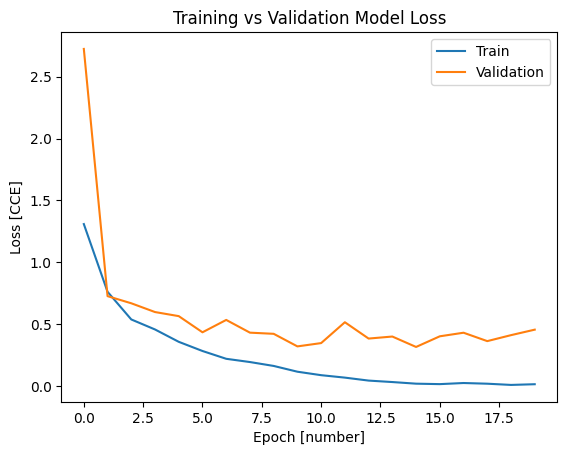

In [68]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [69]:
model = load_model('../data/models/language_detection_model_scaled_v2.keras')
model.evaluate(X_test_scaled, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8986 - loss: 0.3599


[0.4241079092025757, 0.8899999856948853]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

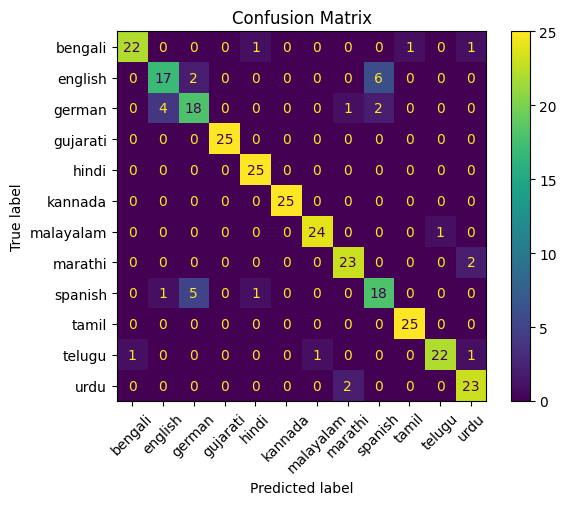

In [70]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [71]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.94

In [72]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.77      0.68      0.72        25
           2       0.72      0.72      0.72        25
           3       1.00      1.00      1.00        25
           4       0.93      1.00      0.96        25
           5       1.00      1.00      1.00        25
           6       0.96      0.96      0.96        25
           7       0.88      0.92      0.90        25
           8       0.69      0.72      0.71        25
           9       0.96      1.00      0.98        25
          10       0.96      0.88      0.92        25
          11       0.85      0.92      0.88        25

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


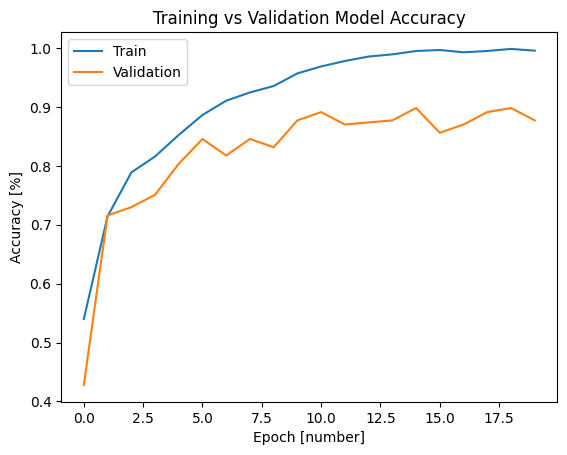

In [73]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

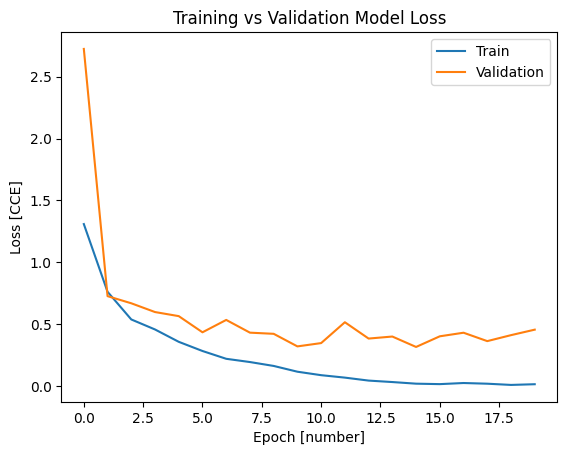

In [74]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN Spectogram Model

In [75]:
spectogram_images = image_dataset_from_directory("../data/model_data/spectrogram_images", labels="inferred", image_size=(64, 64), batch_size=None, shuffle=True)
class_names = spectogram_images.class_names

test_val_records = 150

test_images = spectogram_images.take(test_val_records)
train_images = spectogram_images.skip(test_val_records)

val_images = train_images.take(test_val_records)
train_images = train_images.skip(test_val_records)

size = (64, 64)

train_data = train_images.map(lambda x, y: (tf.image.resize(x, size), y))
val_data = val_images.map(lambda x, y: (tf.image.resize(x, size), y))
test_data = test_images.map(lambda x, y: (tf.image.resize(x, size), y))

print(f'Train Data Size: {len([i for i, v in enumerate(train_data.as_numpy_iterator())])}')
print(f'Validation Data Size: {len([i for i, v in enumerate(val_data.as_numpy_iterator())])}')
print(f'Test Data Size: {len([i for i, v in enumerate(test_data.as_numpy_iterator())])}')

Found 6000 files belonging to 12 classes.
Train Data Size: 5700
Validation Data Size: 150
Test Data Size: 150


In [76]:
train_image_data = np.array([images for (images, _) in train_data.as_numpy_iterator()])
val_image_data = np.array([images for (images, _) in val_data.as_numpy_iterator()])
test_image_data = np.array([images for (images, _) in test_data.as_numpy_iterator()])

train_labels = np.array([labels for (_, labels) in train_data.as_numpy_iterator()])
val_labels = np.array([labels for (_, labels) in val_data.as_numpy_iterator()])
test_labels = np.array([labels for (_, labels) in test_data.as_numpy_iterator()])

train_image_data, train_labels = np.concatenate(train_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(train_labels, dtype=np.int32).values
val_image_data, val_labels = np.concatenate(val_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(val_labels, dtype=np.int32).values
test_image_data, test_labels = np.concatenate(test_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(test_labels, dtype=np.int32).values

'malayalam'

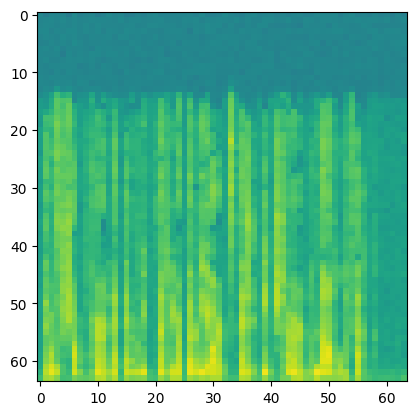

In [77]:
plt.imshow(np.array(train_image_data[0]).astype('uint8'))
class_names[np.argmax(train_labels[0])]

In [84]:
def build_model_cnn_spectrogram(output_shape: int) -> object:
    model = Sequential()

    model.add(Input(shape=(64, 64, 3), name='input'))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [85]:
model = build_model_cnn_spectrogram(output_shape=12)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_raw_v3.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    train_image_data, train_labels, epochs=20, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(val_image_data, val_labels))

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.0805 - loss: 2.8561 - val_accuracy: 0.0867 - val_loss: 3.1819 - learning_rate: 0.0014
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.0865 - loss: 2.6281 - val_accuracy: 0.0933 - val_loss: 3.0939 - learning_rate: 0.0013
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.0882 - loss: 2.5883 - val_accuracy: 0.0800 - val_loss: 2.6518 - learning_rate: 0.0012
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.0961 - loss: 2.5408 - val_accuracy: 0.0867 - val_loss: 2.5949 - learning_rate: 0.0010
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.0919 - loss: 2.5229 - val_accuracy: 0.0933 - val_loss: 2.4960 - learning_rate: 9.3297e-04
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.0790 - loss: 2.5224 - val_accuracy: 0.0400 - val_loss: 2.5927 - learning_rate: 8.3968e-04
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accur

In [86]:
model = load_model('../data/models/language_detection_model_raw_v3.keras')
model.evaluate(test_image_data, test_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0884 - loss: 2.8926


[2.930180072784424, 0.09333333373069763]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.13      0.40      0.20        15
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.07      0.54      0.12        13
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        12
          11       0.50      0.08      0.14        12

    accuracy                           0.09       150
   macro avg       0.06      0.09      0.04       150
weighted avg       0.06      0.09      0.04       150



<Figure size 800x600 with 0 Axes>

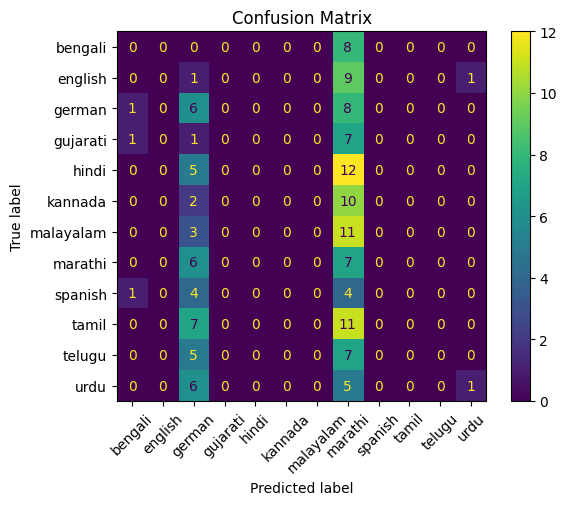

In [87]:
y_pred = model.predict(test_image_data)

y_test_argmax = [np.argmax(test_labels[i,:]) for i in range(0, len(test_labels))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0, len(test_labels))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=class_names)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

print(classification_report(y_test_argmax, y_pred_argmax))

In [88]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.5010663579753446

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


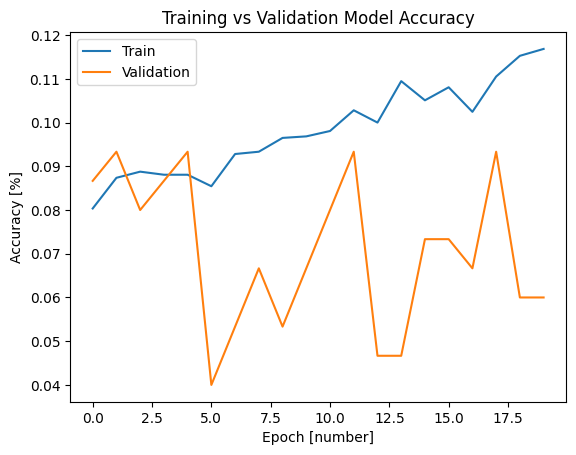

In [89]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

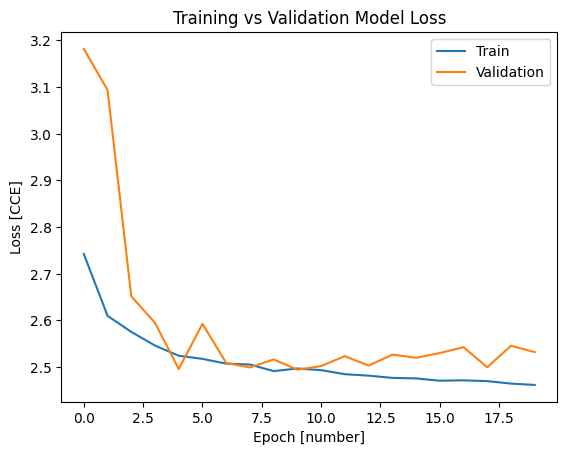

In [90]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()